### IMPORTING NECESSARY LIBRARIES


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### IMPORTING THE DATASET


In [10]:
# Load the dataset
df = pd.read_csv("C:/Users/91964/Desktop/PROJECT/PCOS_data.csv")
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


### EXPLORATORY DATA ANALYSIS


In [11]:
# Exploratory Data Analysis (EDA)
print(df.info())
print(df.describe())
print(df['PCOS (Y/N)'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

### DATA PRE-PROCESSING

In [17]:
# Adjust the categorical features based on the actual column names
categorical_features = ['Blood Group', 'Cycle(R/I)', 'Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 
                        'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)']

# Verify that these columns are in the DataFrame
for col in categorical_features:
    if col not in df.columns:
        print(f"Column {col} not found in DataFrame")

# Convert columns to numeric and handle non-numeric values
def convert_to_numeric(df, columns):
    for col in columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# Separate numeric and categorical features
numeric_features = df.columns.drop(['Sl. No', 'Patient File No.', 'PCOS (Y/N)'] + categorical_features)

# Convert numeric features to numeric type
df = convert_to_numeric(df, numeric_features)

# Handle missing values for numeric features
imputer_numeric = SimpleImputer(strategy='mean')
df_numeric = pd.DataFrame(imputer_numeric.fit_transform(df[numeric_features]), columns=numeric_features)

# Handle missing values for categorical features
imputer_categorical = SimpleImputer(strategy='most_frequent')
df_categorical = pd.DataFrame(imputer_categorical.fit_transform(df[categorical_features]), columns=categorical_features)

# Encode categorical variables
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df_categorical[col] = le.fit_transform(df_categorical[col])
    label_encoders[col] = le

# Normalize numerical features
scaler = StandardScaler()
df_numeric = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_features)

# Merge processed numeric and categorical features
df_imputed = pd.concat([df_numeric, df_categorical, df[['PCOS (Y/N)']]], axis=1)

# Split the dataset into training and testing sets
X = df_imputed.drop(['PCOS (Y/N)'], axis=1)
y = df_imputed['PCOS (Y/N)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection using Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
print(feature_importances.head(10))

# Select top features
top_features = feature_importances.head(20).index
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

Follicle No. (R)        0.200486
Follicle No. (L)        0.131727
Skin darkening (Y/N)    0.051442
Weight gain(Y/N)        0.049872
hair growth(Y/N)        0.044430
AMH(ng/mL)              0.038409
Cycle(R/I)              0.036796
Cycle length(days)      0.023445
FSH/LH                  0.023069
LH(mIU/mL)              0.021749
dtype: float64


### MODEL TRAINING AND EVALUATION

SVM Evaluation:
Accuracy: 0.89
Precision: 0.86
Recall: 0.75
F1 Score: 0.80
ROC AUC: 0.94


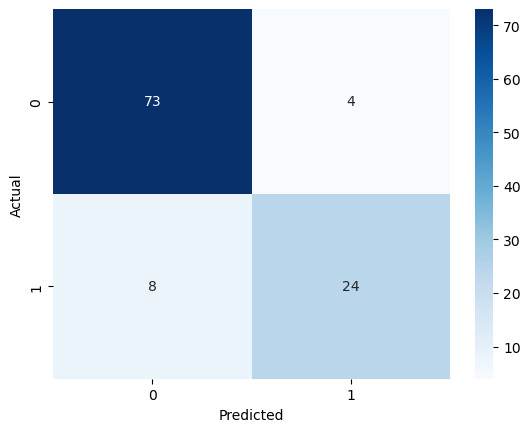

Random Forest Evaluation:
Accuracy: 0.87
Precision: 0.80
Recall: 0.75
F1 Score: 0.77
ROC AUC: 0.95


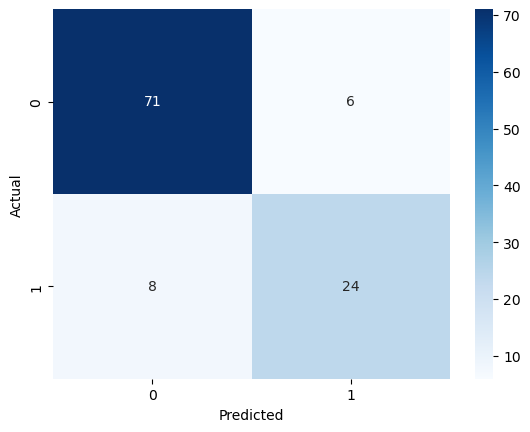

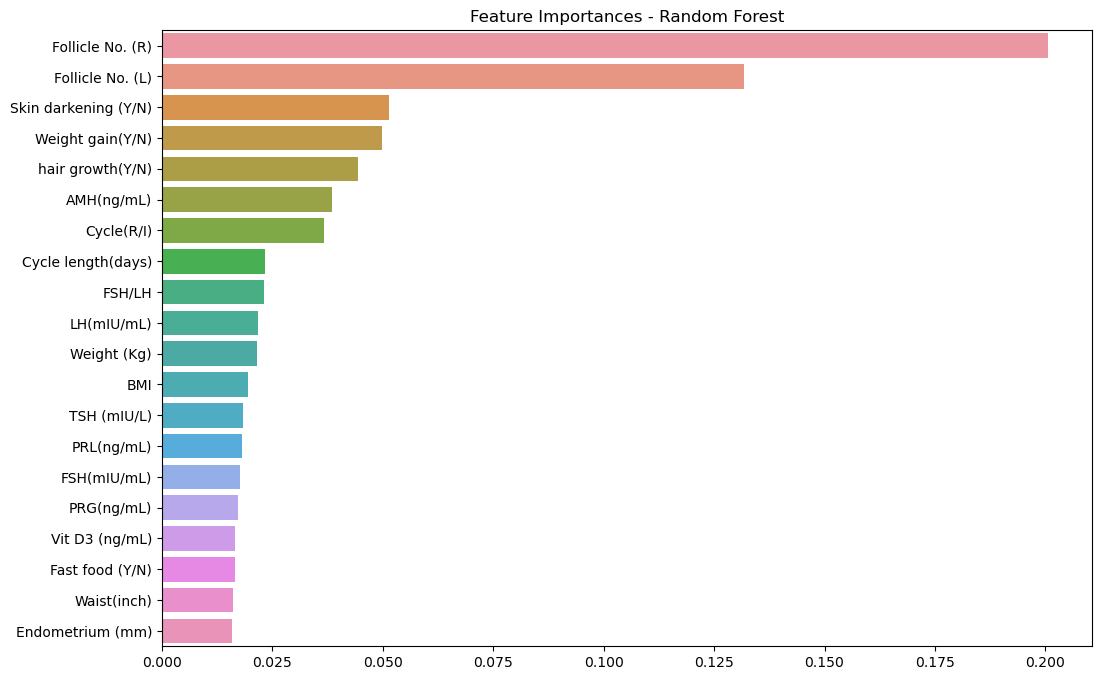

In [18]:
# Support Vector Machine (SVM)
svm = SVC(probability=True, random_state=42)
svm_params = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}
svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='roc_auc')
svm_grid.fit(X_train_selected, y_train)
svm_best = svm_grid.best_estimator_

# Random Forest
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='roc_auc')
rf_grid.fit(X_train_selected, y_train)
rf_best = rf_grid.best_estimator_

# Model Evaluation Function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(f'ROC AUC: {roc_auc:.2f}')
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate SVM
print("SVM Evaluation:")
evaluate_model(svm_best, X_test_selected, y_test)

# Evaluate Random Forest
print("Random Forest Evaluation:")
evaluate_model(rf_best, X_test_selected, y_test)

# Feature Importance Plot for Random Forest
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances[top_features], y=top_features)
plt.title('Feature Importances - Random Forest')
plt.show()